In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = ('/content/drive/MyDrive/MobileMoneyDLMs/synthetic_mobile_money_transaction_dataset (2).csv')
df = pd.read_csv(path)

# **Exploratory Data Analysis**

---



In [ ]:
#checking the shape of the dataset
df.shape

(4225958, 10)

* The dataset has 4225958 records or entries with 10 features

In [ ]:
import pandas as pd

# Load your data
df = pd.read_csv("your_dataset.csv")  # Replace with your actual file path

# Define the serialization function
def formal_serialize(row):
    label = "fraudulent" if row["isFraud"] == 1 else "legitimate"
    return (
        f"At simulation step {int(row['step'])}, a transfer amounting to ${row['amount']:.2f} "
        f"resulted in the initiator's balance decreasing from ${row['oldBalInitiator']:.2f} to ${row['newBalInitiator']:.2f}, "
        f"while the recipient's balance increased from ${row['oldBalRecipient']:.2f} to ${row['newBalRecipient']:.2f}. "
        f"This transaction has been classified as {label}."
    )

# Apply the serialization
df["serialized"] = df.apply(formal_serialize, axis=1)

# (Optional) Save to file
df[["serialized", "isFraud"]].to_csv("serialized_transactions.csv", index=False)


In [ ]:
#printing the first five rows of the dataset
df.head()

,step,transactionType,amount,initiator,oldBalInitiator,newBalInitiator,recipient,oldBalRecipient,newBalRecipient,isFraud
0,0,PAYMENT,579.16,4018807983755588,29.32,29.32,30-0000345,0.00,0.00,0
1,0,TRANSFER,39.03,4610593854752035,39.03,0.00,4944921135715488,55.94,94.98,1
2,0,TRANSFER,21.78,4840578447365454,21.78,0.00,4305579785620656,58.09,79.88,1
3,0,PAYMENT,570.22,4958066799829630,5.29,5.29,00-0000388,0.00,0.00,0
4,0,PAYMENT,574.80,4149196095918843,82.63,82.63,80-0005320,0.00,0.00,0


In [ ]:
import pandas as pd

# Count and percentage of fraudulent vs. legitimate transactions
counts = df['isFraud'].value_counts()
percentages = df['isFraud'].value_counts(normalize=True) * 100

# Rename index values
counts.index = ['Fraud', 'Legitimate']
percentages.index = ['Fraud', 'Legitimate']

# Create a DataFrame for a tabular display
result = pd.DataFrame({'Transaction Count': counts, 'Percentage (%)': percentages})

# Display result
print(result)


            Transaction Count  Percentage (%)
Fraud                 2233118       52.842882
Legitimate            1992840       47.157118


* About 52.8% are non-legitimate transactions and 47.2% are legitimate.

<ipython-input-7-0350309ecfe3>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=result['Transaction Count'], ax=axes[0], palette=colors)


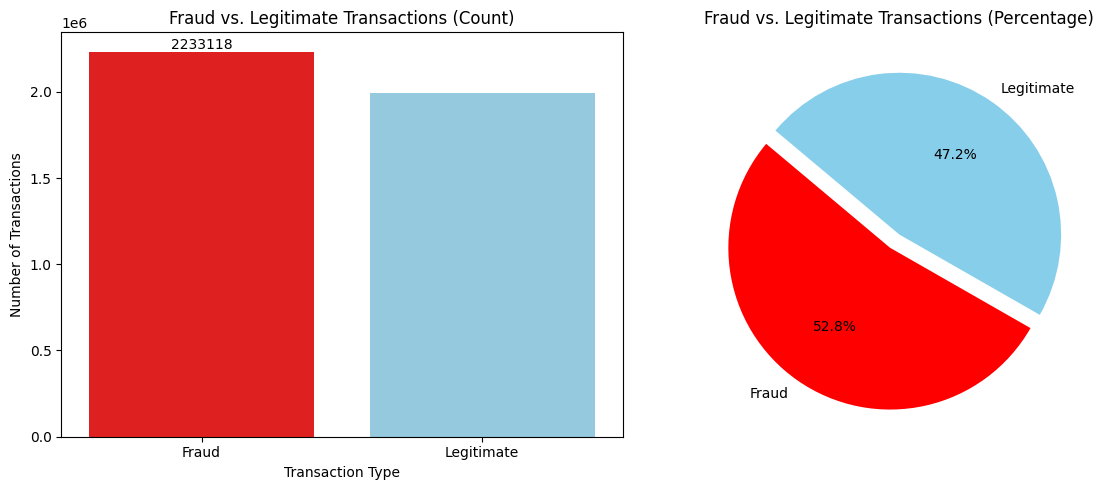

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count and percentage of fraudulent vs. legitimate transactions
counts = df['isFraud'].value_counts()
percentages = df['isFraud'].value_counts(normalize=True) * 100

# Rename index values
counts.index = ['Fraud', 'Legitimate']
percentages.index = ['Fraud', 'Legitimate']

# Create DataFrame
result = pd.DataFrame({'Transaction Count': counts, 'Percentage (%)': percentages})

# Define labels and colors
labels = result.index
colors = ['red', 'skyblue']

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart - Transaction Count
sns.barplot(x=labels, y=result['Transaction Count'], ax=axes[0], palette=colors)
axes[0].set_ylabel('Number of Transactions')
axes[0].set_xlabel('Transaction Type')
axes[0].set_title('Fraud vs. Legitimate Transactions (Count)')
axes[0].bar_label(axes[0].containers[0], fmt='%d')  # Add count labels

# Pie Chart - Percentage of Transactions
axes[1].pie(result['Transaction Count'], labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, explode=[0.1, 0])
axes[1].set_title('Fraud vs. Legitimate Transactions (Percentage)')

# Show plots
plt.tight_layout()
plt.show()


In [ ]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225958 entries, 0 to 4225957
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   transactionType  object 
 2   amount           float64
 3   initiator        int64  
 4   oldBalInitiator  float64
 5   newBalInitiator  float64
 6   recipient        object 
 7   oldBalRecipient  float64
 8   newBalRecipient  float64
 9   isFraud          int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 322.4+ MB


In [ ]:
#summary statistics of the dataset
df.describe()

,step,amount,initiator,oldBalInitiator,newBalInitiator,oldBalRecipient,newBalRecipient,isFraud
count,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06
mean,9.811771e+01,5.302139e+04,4.495008e+15,2.246055e+07,2.246527e+07,1.685005e+06,1.703967e+06,5.284288e-01
std,5.573710e+01,2.708194e+06,2.912521e+14,6.418504e+07,6.421561e+07,6.795783e+06,6.802160e+06,4.991912e-01
min,0.000000e+00,0.000000e+00,4.000000e+15,-1.999926e+05,-1.999926e+05,-7.477966e+04,0.000000e+00,0.000000e+00
25%,5.000000e+01,9.444000e+01,4.237994e+15,4.681000e+01,0.000000e+00,3.345156e+04,4.251237e+04,0.000000e+00
50%,9.900000e+01,5.966900e+02,4.491576e+15,3.655435e+03,0.000000e+00,2.007614e+05,2.042479e+05,1.000000e+00
75%,1.470000e+02,1.708469e+04,4.747260e+15,2.344082e+05,8.150306e+04,2.002134e+06,2.041814e+06,1.000000e+00
max,1.920000e+02,7.654805e+08,5.000000e+15,6.409231e+08,6.409231e+08,3.810134e+08,3.813883e+08,1.000000e+00


In [ ]:
#check for null values
df.isnull().sum()

,0
step,0
transactionType,0
amount,0
initiator,0
oldBalInitiator,0
newBalInitiator,0
recipient,0
oldBalRecipient,0
newBalRecipient,0
isFraud,0


* There are no missing values in the dataset

# **Distribution of transaction types in the dataset**

In [ ]:
import pandas as pd

# Calculate proportions
transactionType = df['transactionType'].value_counts()
transaction = transactionType.index
count = transactionType.values
percentages = (count / count.sum()) * 100  # Calculate percentages

# Create a DataFrame
table = pd.DataFrame({
    'Transaction Type': transaction,
    'Count': count,
    'Percentage': percentages.round(2)  # Round percentages to 2 decimal places
})

# Display the table
print(table)


  Transaction Type    Count  Percentage
0         TRANSFER  2510947       59.42
1          PAYMENT  1677798       39.70
2       WITHDRAWAL    27064        0.64
3          DEPOSIT     8824        0.21
4            DEBIT     1325        0.03


* Transfer is dominating with over 59% transactions, which means most people
prefer transer of money from one person to another person or from one account to another account over direct cash withdrawal which is at 0.64%.

* Payment has over 39.70% which represents bill payment, consumer to business or business to business payment.

* The low proportion of withdrawal and deposit in the dataset would could also mean most people prefer their money to flow within the mobile money system than removing and depositing.

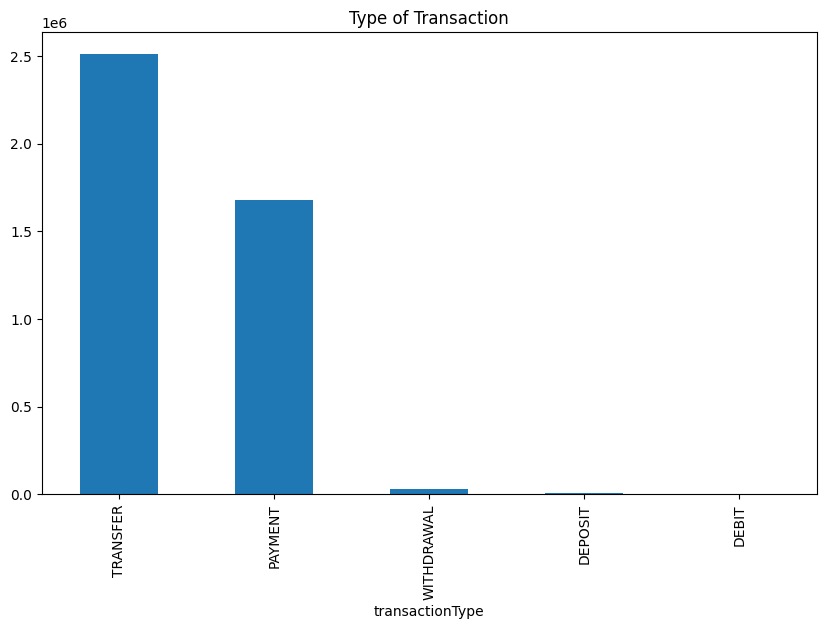

In [ ]:

#plotting number of transactions per type
f, ax = plt.subplots(1,1, figsize=(8,8))
# plotting the number of different types of values present in type column
df.transactionType.value_counts().plot(kind='bar',
        title="Type of Transaction", ax=ax, figsize=(10,6))
plt.show()

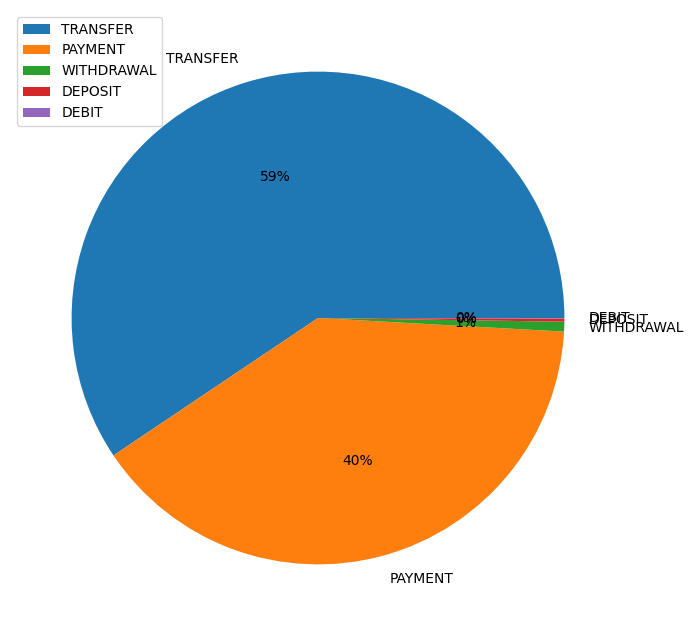

In [ ]:
#Proportion of type of Transactions
transactionType = df['transactionType'].value_counts()
transaction = transactionType.index
count = transactionType.values

# drawing piechart
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

# **Fraud Transactions across Type of Transaction.**

In [ ]:
import pandas as pd

# Grouping data based on transaction type and isFraud
grouped_data = df.groupby(['transactionType', 'isFraud']).size().reset_index(name='Number of Transactions')

# Adding proper column names
grouped_data.columns = ['Transaction Type', 'Is Fraud', 'Number of Transactions']

# Displaying the table
print(grouped_data)


  Transaction Type  Is Fraud  Number of Transactions
0            DEBIT         0                    1325
1          DEPOSIT         0                    8824
2          PAYMENT         0                 1677798
3         TRANSFER         0                  277829
4         TRANSFER         1                 2233118
5       WITHDRAWAL         0                   27064


In [ ]:
import pandas as pd

# Grouping data based on transaction type and isFraud
grouped_data = df.groupby(['transactionType', 'isFraud']).size().reset_index(name='Number of Transactions')

# Replacing 0 with 'Legitimate' and 1 with 'Suspicious'
grouped_data['isFraud'] = grouped_data['isFraud'].replace({0: 'Legitimate', 1: 'Fraud'})

# Renaming columns
grouped_data.columns = ['Transaction Type', 'Is Fraud', 'Number of Transactions']

# Displaying the table
grouped_data


,Transaction Type,Is Fraud,Number of Transactions
0,DEBIT,Legitimate,1325
1,DEPOSIT,Legitimate,8824
2,PAYMENT,Legitimate,1677798
3,TRANSFER,Legitimate,277829
4,TRANSFER,Fraud,2233118
5,WITHDRAWAL,Legitimate,27064


* The analysis shows that 1325 were legitimate debit transactions, 8824 were legitimate deposit transactions, payment has highest legitmate occurrance with 1677798 transactions, 2233118 non-legitimate transfer transactions occurred with 277829 legitimate and all the withdrawal transactions of 27064 were legitimate.

* Transfer transaction has the most fraudulent transactions with over 2233118 occurrences. This means to detect money laundering in this dataset, the focus will be on transfer transactions.

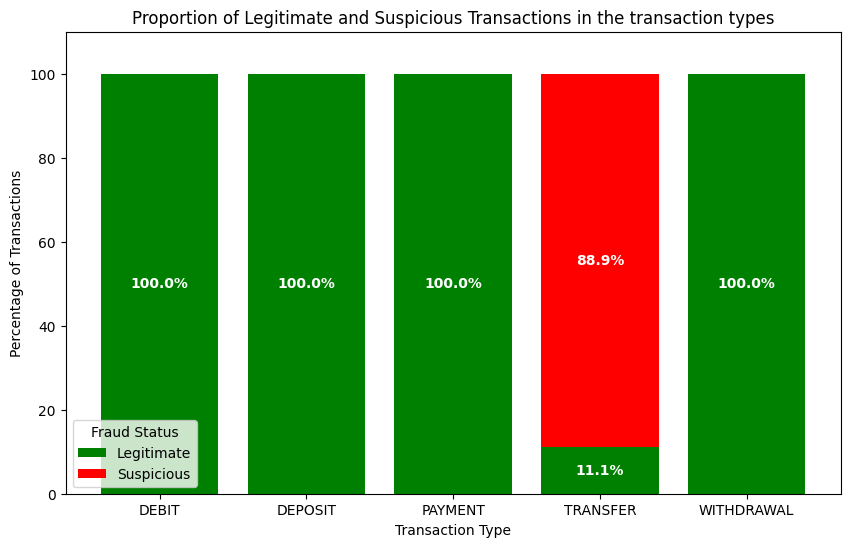

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data
data = {
    'Transaction Type': ['DEBIT', 'DEPOSIT', 'PAYMENT', 'TRANSFER', 'WITHDRAWAL'],
    'Legitimate': [1325, 8824, 1677798, 277829, 27064],  # Legitimate transactions
    'Suspicious': [0, 0, 0, 2233118, 0]  # Suspicious transactions (only in TRANSFER)
}

# Create DataFrame
df = pd.DataFrame(data)

# Compute total transactions for each type
df["Total"] = df["Legitimate"] + df["Suspicious"]

# Compute percentages
df["Legitimate %"] = (df["Legitimate"] / df["Total"]) * 100
df["Suspicious %"] = (df["Suspicious"] / df["Total"]) * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Legitimate transactions (Green)
ax.bar(df["Transaction Type"], df["Legitimate %"], color='green', label="Legitimate")

# Plot Suspicious transactions (Red) on top of Legitimate
ax.bar(df["Transaction Type"], df["Suspicious %"], bottom=df["Legitimate %"], color='red', label="Suspicious")

# Add percentage labels on bars
for i, row in df.iterrows():
    ax.text(i, row["Legitimate %"] / 2, f'{row["Legitimate %"]:.1f}%', ha='center', va='center', color='white', weight='bold')
    if row["Suspicious %"] > 0:
        ax.text(i, row["Legitimate %"] + row["Suspicious %"] / 2, f'{row["Suspicious %"]:.1f}%', ha='center', va='center', color='white', weight='bold')

# Labels and title
ax.set_xlabel("Transaction Type")
ax.set_ylabel("Percentage of Transactions")
ax.set_title("Proportion of Legitimate and Suspicious Transactions in the transaction types")
ax.legend(title="Fraud Status")
ax.set_ylim(0, 110)

# Show the plot
plt.show()


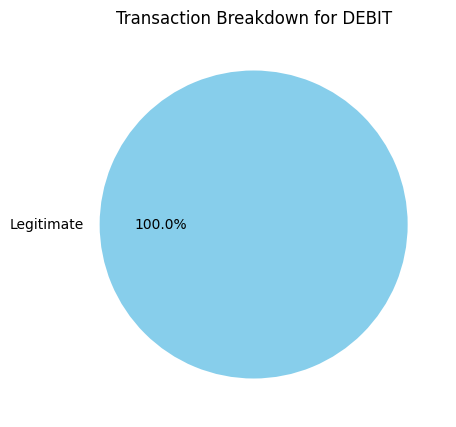

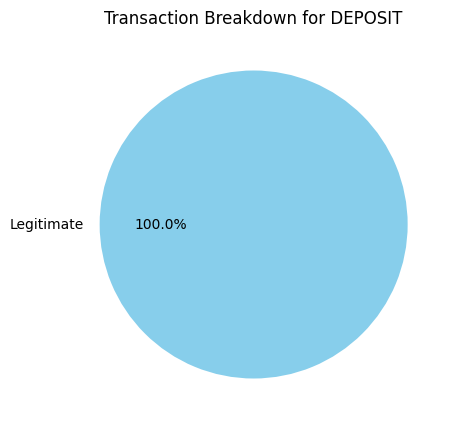

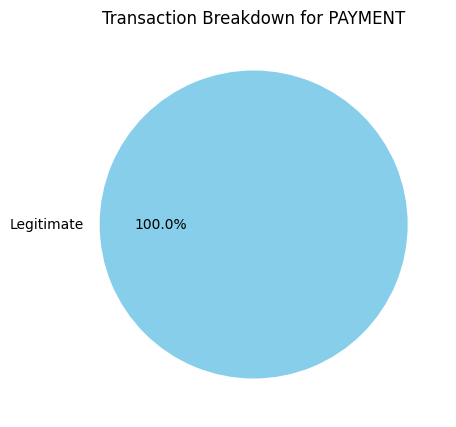

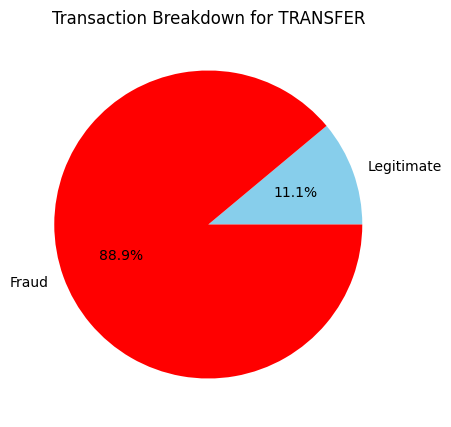

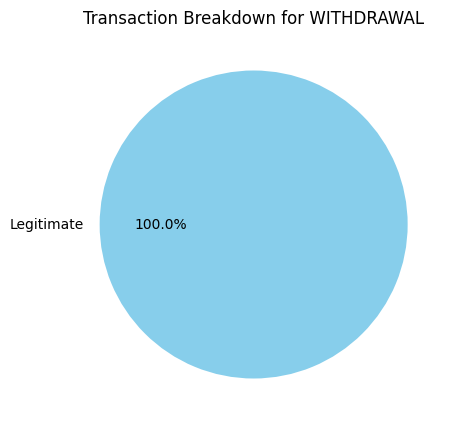

In [ ]:
# Plotting pie charts for each transaction type
for transaction_type in grouped_data['Transaction Type'].unique():
    subset = grouped_data[grouped_data['Transaction Type'] == transaction_type]

    plt.figure(figsize=(5, 5))
    plt.pie(subset['Number of Transactions'], labels=subset['Is Fraud'], autopct='%1.1f%%', colors=['skyblue', 'red'])
    plt.title(f'Transaction Breakdown for {transaction_type}')
    plt.show()


In [ ]:
df.columns

Index(['Transaction Type', 'Legitimate', 'Suspicious', 'Total', 'Legitimate %',
       'Suspicious %'],
      dtype='object')

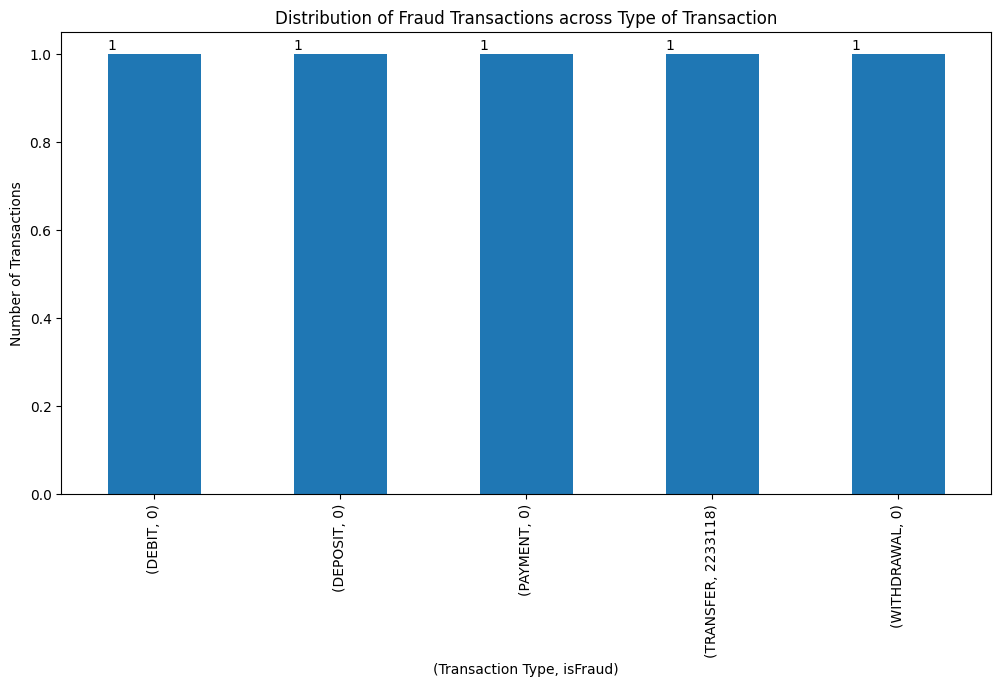

In [ ]:
import matplotlib.pyplot as plt

# Ensure the column names are cleaned
df.columns = df.columns.str.strip()

# Set figure size
plt.figure(figsize=(12, 6))

# Grouping data points based on transaction type and fraud status ('Suspicious' is used for fraud status)
ax = df.groupby(['Transaction Type', 'Suspicious']).size().plot(kind='bar')

# Setting the title and labels
ax.set_title("Distribution of Fraud Transactions across Type of Transaction")
ax.set_xlabel("(Transaction Type, isFraud)")
ax.set_ylabel("Number of Transactions")

# Annotating each bar with its value
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')),
                (p.get_x(), p.get_height() * 1.01))

plt.show()


In [ ]:
# Print out column names to check for any issues
print(df.columns)


Index(['Transaction Type', 'Legitimate', 'Suspicious', 'Total', 'Legitimate %',
       'Suspicious %'],
      dtype='object')


In [ ]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction Type  5 non-null      object 
 1   Legitimate        5 non-null      int64  
 2   Suspicious        5 non-null      int64  
 3   Total             5 non-null      int64  
 4   Legitimate %      5 non-null      float64
 5   Suspicious %      5 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 372.0+ bytes


# **Checking for multiple fraudulent transactions using the same account**

In [ ]:
#checking whether the recipient account of a fraudulent transfer was used as a sending account for withdrawal
fraud = df[df["isFraud"] == 1]
valid = df[df["isFraud"] == 0]

fraud_transfer = fraud[fraud["transactionType"] == "TRANSFER"]
fraud_withdrawal = fraud[fraud["transactionType"] == " WITHDRAWAL"]

fraud_transfer.oldBalRecipient.isin(fraud_withdrawal.oldBalRecipient).any()

np.False_

In [ ]:
# Ensure the column names are stripped of any whitespace
df.columns = df.columns.str.strip()

# Checking whether the recipient account of a fraudulent transfer was used as a sending account for withdrawal
fraud = df[df["isFraud"] == 1]
valid = df[df["isFraud"] == 0]

fraud_transfer = fraud[fraud["transactionType"] == "TRANSFER"]
fraud_withdrawal = fraud[fraud["transactionType"] == "WITHDRAWAL"]

# Checking if the recipient's old balance in fraudulent transfers appears in fraudulent withdrawals
fraud_transfer["oldBalRecipient"].isin(fraud_withdrawal["oldBalRecipient"]).any()


np.False_

* This shows that no account that was used in fraudulent transfer activities and was used in fraudulent withdrawal transactions.

* The money launderers avoid using same account to do multiple fraudulent transactions.

* Therefore the dataset may not have a relationship between fraudulent transfer and withdrawals.

In [ ]:

#check whether fraud occurs using specific destination account
datasetA=df[(df['isFraud']==1) & (df['transactionType']=='TRANSFER')]
datasetA['oldBalRecipient'].value_counts()

KeyError: 'isFraud'

Fraudulent transfer occcurs mostly in recipient accounts with zero balances about 343951 times, this means the money launderers prefer newly created accounts or dormant accounts to conduct their activities. This could also reduce the risk of detection since there is no prior transactions.

In [ ]:

datasetB=df[(df['isFraud']==1) & (df['transactionType']=='WITHDRAWAL')]
datasetB['newBalRecipient'].value_counts()

,count
newBalRecipient,


The dataset does not show any fraudulent transactions in the withdrawal

Text(0.5, 1.0, 'oldBalRecipient vs Fraud')

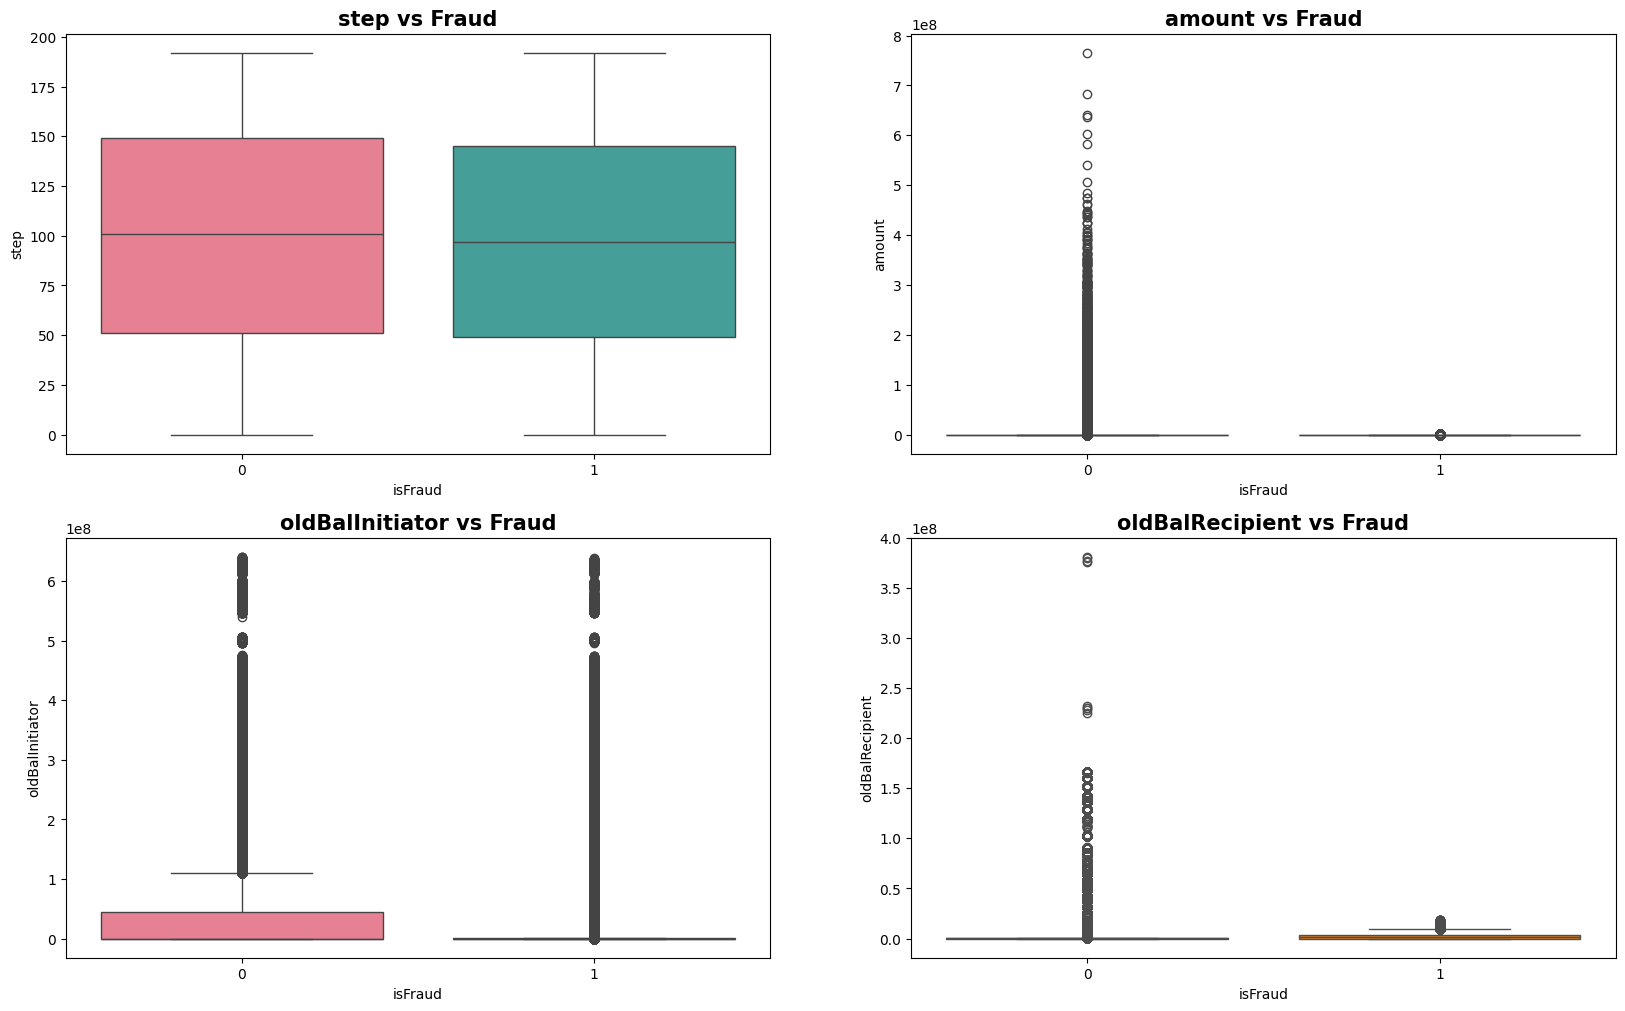

In [ ]:

#Plotting numeric variables against fraud
#Boxplots used for this visualization
import seaborn as sns

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = df, palette="husl", hue='isFraud', legend=False)
plt.title('step vs Fraud',fontweight="bold", size=15)
plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = df,palette="husl", hue='isFraud', legend=False)
plt.title('amount vs Fraud',fontweight="bold", size=15)
plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldBalInitiator', data = df, palette= 'husl', hue='isFraud', legend=False)
plt.title('oldBalInitiator vs Fraud',fontweight="bold", size=15)
plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldBalRecipient', data = df,palette="bright", hue='isFraud', legend=False)
plt.title('oldBalRecipient vs Fraud',fontweight="bold", size=15)

In [ ]:
#check the largest fraudulent amount
df[df['isFraud']==1]['amount'].max()

998950.05

In [ ]:
#check the smallest fraudulent amount
df[df['isFraud']==1]['amount'].min()

0.0

# **Identifying discrepancies in balances before and after transactions.**

In [ ]:
# checking for balances before and after transactions
wrong_orig_bal = sum(df["oldBalInitiator"] - df["amount"] != df["newBalInitiator"])
wrong_dest_bal = sum(df["newBalRecipient"] + df["amount"] != df["newBalRecipient"])
print("Percentage of entries with balance errors in the account making a transfer: ", 100*round(wrong_orig_bal/len(df),2))
print("Percentage of entries with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(df),2))


Percentage of entries with balance errors in the account making a transfer:  42.0
Percentage of entries with balance errors in the account receiving money:  100.0


The errors could potentially show signs of fraudulent activity that violate the transaction rules.

In [ ]:
# checking if missing values contributes to the errors calculated
print(df[['oldBalRecipient', 'newBalRecipient']].isnull().sum())


oldBalRecipient    0
newBalRecipient    0
dtype: int64


In [ ]:
# checking the contribution of transaction types to the errors
for t_type in df['transactionType'].unique():
    subset = df[df['transactionType'] == t_type]
    orig_error = sum(subset["oldBalInitiator"] - subset["amount"] != subset["newBalInitiator"])
    dest_error = sum(subset["oldBalRecipient"] + subset["amount"] != subset["newBalRecipient"])
    print(f"Transaction Type: {t_type}")
    print(f"  % Errors in Originator's Account: {100 * round(orig_error / len(subset), 2)}%")
    print(f"  % Errors in Recipient's Account: {100 * round(dest_error / len(subset), 2)}%")


Transaction Type: PAYMENT
  % Errors in Originator's Account: 71.0%
  % Errors in Recipient's Account: 71.0%
Transaction Type: TRANSFER
  % Errors in Originator's Account: 23.0%
  % Errors in Recipient's Account: 45.0%
Transaction Type: DEPOSIT
  % Errors in Originator's Account: 100.0%
  % Errors in Recipient's Account: 100.0%
Transaction Type: WITHDRAWAL
  % Errors in Originator's Account: 44.0%
  % Errors in Recipient's Account: 100.0%
Transaction Type: DEBIT
  % Errors in Originator's Account: 44.0%
  % Errors in Recipient's Account: 100.0%


This shows that transfer transactions is more influential in detecting money laundering in this datasaet

In [ ]:
df.columns

Index(['step', 'transactionType', 'amount', 'initiator', 'oldBalInitiator',
       'newBalInitiator', 'recipient', 'oldBalRecipient', 'newBalRecipient',
       'isFraud'],
      dtype='object')

In [ ]:
import pandas as pd


# Drop 'initiator' and 'recipient' columns
df = df.drop(columns=['initiator', 'recipient'])

# Save the cleaned dataset (optional)
df.to_csv("/content/drive/MyDrive/MobileMoneyDLMs/cleaned_mobile_money_dataset.csv", index=False)

# Display first few rows to confirm
df.head()


,step,transactionType,amount,oldBalInitiator,newBalInitiator,oldBalRecipient,newBalRecipient,isFraud
0,0,PAYMENT,579.16,29.32,29.32,0.00,0.00,0
1,0,TRANSFER,39.03,39.03,0.00,55.94,94.98,1
2,0,TRANSFER,21.78,21.78,0.00,58.09,79.88,1
3,0,PAYMENT,570.22,5.29,5.29,0.00,0.00,0
4,0,PAYMENT,574.80,82.63,82.63,0.00,0.00,0


Initiator and recipient were dropped since they are just identifiers and may not directly contribute to predictions. Additinally dropping recipient will reduce computation resources since it requires encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'transactionType' column
df['transactionType'] = encoder.fit_transform(df['transactionType'])

# Display the mapping of transaction types to their encoded values
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Transaction Type Encoding Mapping:", mapping)

# Verify the changes
df[['transactionType']].head()


Transaction Type Encoding Mapping: {'DEBIT': np.int64(0), 'DEPOSIT': np.int64(1), 'PAYMENT': np.int64(2), 'TRANSFER': np.int64(3), 'WITHDRAWAL': np.int64(4)}


,transactionType
0,2
1,3
2,3
3,2
4,2


# **Splitting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# First, split into 80% training and 20% remaining (testing + validation)
train_data, temp_data = train_test_split(df, test_size=0.2, random_state=42)

# Then, split the remaining 20% into 50% testing and 50% validation (i.e., 10% each of the original data)
test_data, val_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Verify the shapes of the splits
print(f"Training Data Shape: {train_data.shape}")
print(f"Testing Data Shape: {test_data.shape}")
print(f"Validation Data Shape: {val_data.shape}")


Training Data Shape: (3380766, 8)
Testing Data Shape: (422596, 8)
Validation Data Shape: (422596, 8)


In [ ]:
# Save the splits as CSV files
train_data.to_csv('/content/drive/MyDrive/MobileMoneyDLMs/train_data.csv', index=False)
test_data.to_csv('/content/drive/MyDrive/MobileMoneyDLMs/test_data.csv', index=False)
val_data.to_csv('/content/drive/MyDrive/MobileMoneyDLMs/val_data.csv', index=False)

In [ ]:
df.columns

Index(['step', 'transactionType', 'amount', 'oldBalInitiator',
       'newBalInitiator', 'oldBalRecipient', 'newBalRecipient', 'isFraud'],
      dtype='object')

# **Feature scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the numerical features
numerical_features = ['step', 'transactionType', 'amount', 'oldBalInitiator',
                       'newBalInitiator', 'oldBalRecipient', 'newBalRecipient', 'isFraud']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler on numerical features (excluding categorical or already scaled columns)
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
test_data[numerical_features] = scaler.transform(test_data[numerical_features])
val_data[numerical_features] = scaler.transform(val_data[numerical_features])

# Check the first few rows after scaling
train_data[numerical_features].head()


,step,transactionType,amount,oldBalInitiator,newBalInitiator,oldBalRecipient,newBalRecipient,isFraud
2637277,0.640625,0.75,9.145889e-08,0.000312,0.000312,0.011547,0.011536,1.0
3126751,0.755208,0.50,9.155033e-07,0.000313,0.000313,0.000530,0.000530,0.0
3249352,0.781250,0.50,7.327031e-07,0.459055,0.458652,0.000530,0.000531,0.0
1827902,0.447917,0.75,5.012654e-05,0.001066,0.001005,0.000044,0.000145,1.0
1824924,0.442708,0.50,7.332779e-07,0.000315,0.000314,0.000266,0.000267,0.0


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features (excluding 'isFraud' for resampling)
X = train_data.drop(columns=['isFraud'])
y = train_data['isFraud']

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
train_data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
train_data_resampled['isFraud'] = y_resampled  # Add target column back

# Display class distribution after resampling
print("Class distribution after SMOTE:\n", train_data_resampled['isFraud'].value_counts())

# Reapply MinMaxScaler (since new synthetic data was generated)
train_data_resampled[numerical_features] = scaler.fit_transform(train_data_resampled[numerical_features])

# Check first few rows
train_data_resampled.head()


Class distribution after SMOTE:
 isFraud
1.0    1786470
0.0    1786470
Name: count, dtype: int64


,step,transactionType,amount,oldBalInitiator,newBalInitiator,oldBalRecipient,newBalRecipient,isFraud
0,0.640625,0.75,9.145889e-08,0.000312,0.000312,0.011547,0.011536,1.0
1,0.755208,0.50,9.155033e-07,0.000313,0.000313,0.000530,0.000530,0.0
2,0.781250,0.50,7.327031e-07,0.459055,0.458652,0.000530,0.000531,0.0
3,0.447917,0.75,5.012654e-05,0.001066,0.001005,0.000044,0.000145,1.0
4,0.442708,0.50,7.332779e-07,0.000315,0.000314,0.000266,0.000267,0.0


# **Saving the final dataset for model building**

In [ ]:
# Define file paths
train_path = "/content/drive/MyDrive/MobileMoneyDLMs/train_data_final.csv"
test_path = "/content/drive/MyDrive/MobileMoneyDLMs/test_data_final.csv"
val_path = "/content/drive/MyDrive/MobileMoneyDLMs/val_data_final.csv"

# Save the preprocessed training dataset (after SMOTE and scaling)
train_data_resampled.to_csv(train_path, index=False)

# Save the test and validation datasets (only scaled, no SMOTE applied)
test_data.to_csv(test_path, index=False)
val_data.to_csv(val_path, index=False)

print("Datasets saved successfully!")
print(f"Train dataset: {train_path}")
print(f"Test dataset: {test_path}")
print(f"Validation dataset: {val_path}")


Datasets saved successfully!
Train dataset: /content/drive/MyDrive/MobileMoneyDLMs/train_data_final.csv
Test dataset: /content/drive/MyDrive/MobileMoneyDLMs/test_data_final.csv
Validation dataset: /content/drive/MyDrive/MobileMoneyDLMs/val_data_final.csv


# **Loading the datasets for building the models**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Load the scaled dataset (replace with your dataset path if needed)
train_data = pd.read_csv('/content/drive/MyDrive/MobileMoneyDLMs/train_data_final.csv')
test_data = pd.read_csv('/content/drive/MyDrive/MobileMoneyDLMs/test_data_final.csv')
val_data = pd.read_csv('/content/drive/MyDrive/MobileMoneyDLMs/val_data_final.csv')



In [ ]:
# Assuming the target variable is 'isFraud' and features are the rest
X_train = train_data.drop(columns=['isFraud'])
y_train = train_data['isFraud']

X_test = test_data.drop(columns=['isFraud'])
y_test = test_data['isFraud']

X_val = val_data.drop(columns=['isFraud'])
y_val = val_data['isFraud']

# **Logistic Regression**

Logistic Regression Params: {'C': 10000000000.0}
Accuracy: 0.8273
ROC-AUC Score: 0.9759

Classification Report:
               precision    recall  f1-score   support

  Legitimate       0.99      0.64      0.78     20105
       Fraud       0.75      0.99      0.86     22155

    accuracy                           0.83     42260
   macro avg       0.87      0.82      0.82     42260
weighted avg       0.87      0.83      0.82     42260



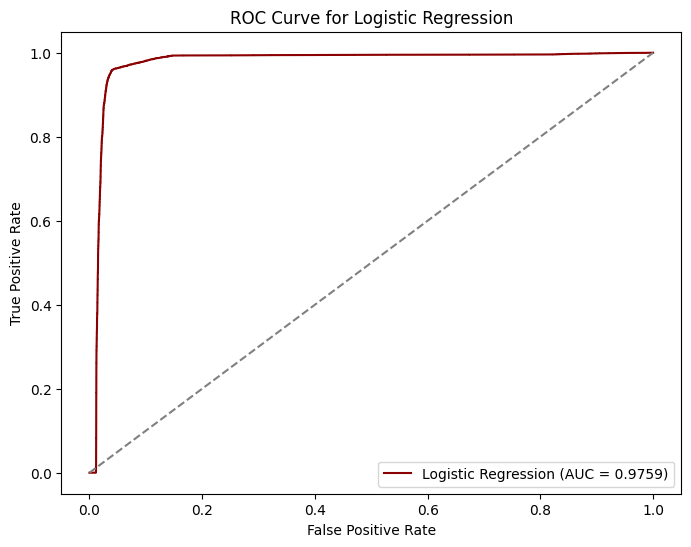

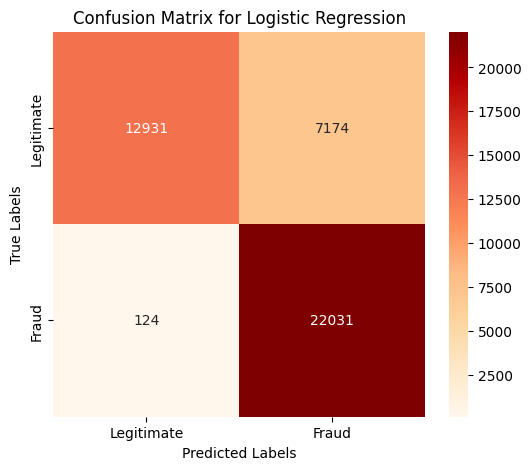

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns



# model setup
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# Possible hyperparameter
param_grid = {'C': [1e10]}

# Cross-validation and grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=2, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Model with best setup
model = grid_search.best_estimator_

# Make predictions with  threshold
y_prob = model.predict_proba(X_test)[:, 1]
y_pred_lr = (y_prob > 0.02).astype(int)

# Evaluate performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob)

print("Logistic Regression Params:", grid_search.best_params_)
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"ROC-AUC Score: {roc_auc_lr:.4f}")

# Classification report
report = classification_report(y_test, y_pred_lr, target_names=['Legitimate', 'Fraud'])
print("\nClassification Report:\n", report)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})', color='darkred')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


# **Random Forest Classifer**

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Random Forest Model: {'n_estimators': 2, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 2}
Accuracy: 0.8926
ROC-AUC Score: 0.9633

Classification Report:
               precision    recall  f1-score   support

  Legitimate       0.93      0.84      0.88     20105
       Fraud       0.87      0.94      0.90     22155

    accuracy                           0.89     42260
   macro avg       0.90      0.89      0.89     42260
weighted avg       0.90      0.89      0.89     42260



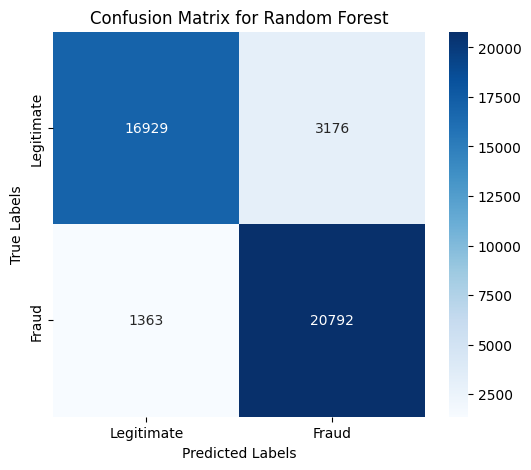

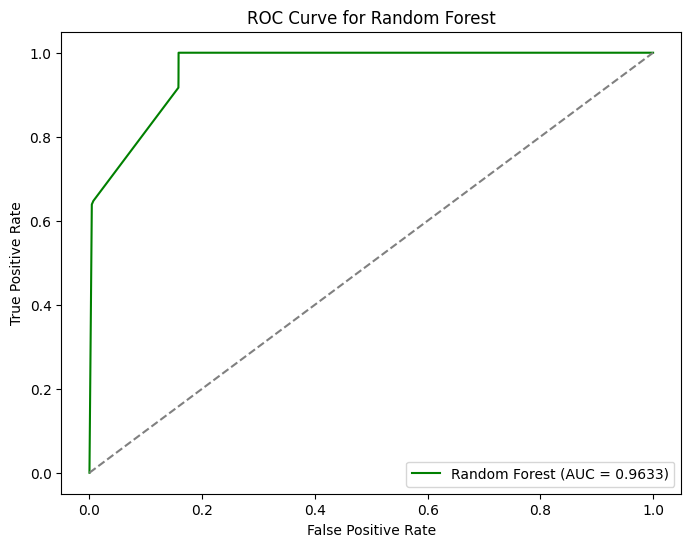

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, warm_start=True)

# Define optimized hyperparameters for tuning
param_grid = {
    'n_estimators': [2],  # number of trees
    'max_depth': [2],  #  depth options
    'min_samples_split': [10],  # splits
    'min_samples_leaf': [2]  #  leaf options
}

# Perform RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    rf_model, param_grid, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)

# Best model after tuning
best_rf_model = random_search.best_estimator_

# Get predicted probabilities for fraud detection
y_probs = best_rf_model.predict_proba(X_test)[:, 1]  # Probability for fraud (class 1)

# Set a custom threshold
threshold = 0.5
y_pred_custom = (y_probs >= threshold).astype(int)  # Predict fraud if probability is >= 0.5

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_custom)
roc_auc = roc_auc_score(y_test, y_probs)

# Print the evaluation metrics
print("Best Random Forest Model:", random_search.best_params_)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Generate classification report with custom labels
report = classification_report(y_test, y_pred_custom, target_names=['Legitimate', 'Fraud'])
print("\nClassification Report:\n", report)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.4f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()


# **XGBoost Model**

Accuracy: 0.9410
ROC-AUC Score: 0.9963

Classification Report:
               precision    recall  f1-score   support

  Legitimate       0.99      0.88      0.93    199221
       Fraud       0.90      0.99      0.95    223375

    accuracy                           0.94    422596
   macro avg       0.95      0.94      0.94    422596
weighted avg       0.95      0.94      0.94    422596



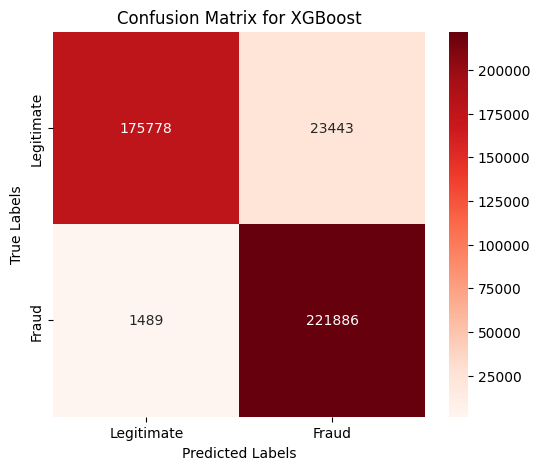

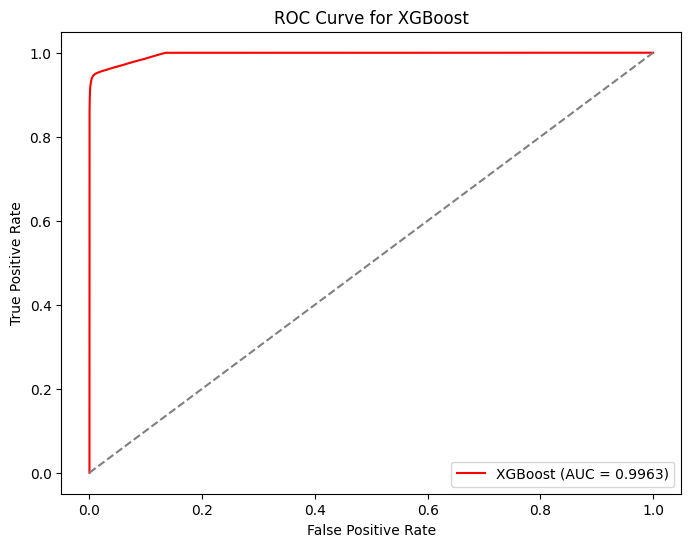

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize  XGBoost model
xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=500,  #  trees
    max_depth=6,  # depth of the trees
    learning_rate=0.8,
    subsample=0.9,
    colsample_bytree=0.8
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predictions with probability scores
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # Probability for fraud (class 1)

# Apply decision threshold
threshold = 0.2
y_pred = (y_prob >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Output results
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Legitimate', 'Fraud'])
print("\nClassification Report:\n", report)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.4f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend()
plt.show()


# **Gaussian Naive Bayes**

Accuracy: 0.9333
ROC-AUC Score: 0.9561

Classification Report:
               precision    recall  f1-score   support

  Legitimate       1.00      0.86      0.92    199221
       Fraud       0.89      1.00      0.94    223375

    accuracy                           0.93    422596
   macro avg       0.94      0.93      0.93    422596
weighted avg       0.94      0.93      0.93    422596



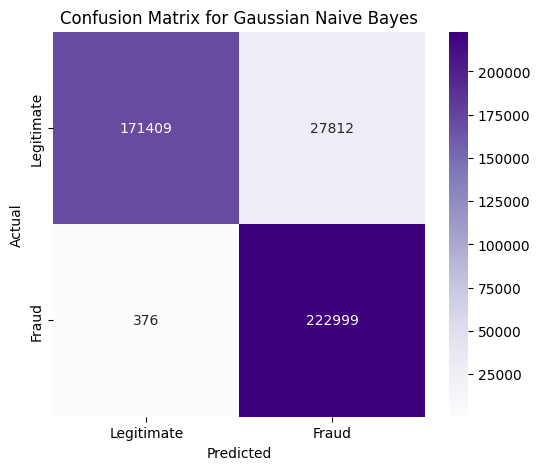

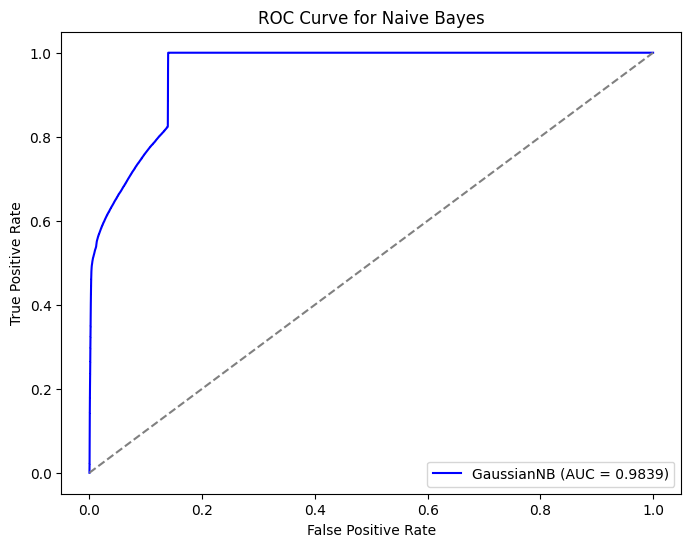

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Drop powerful features (simulate lower-quality input)
X_train_reduced = X_train.drop(['amount', 'oldBalInitiator', 'newBalInitiator'], axis=1)
X_test_reduced = X_test.drop(['amount', 'oldBalInitiator', 'newBalInitiator'], axis=1)

# Use skewed priors and train GNB
gnb_model = GaussianNB(priors=[0.999, 0.001])
gnb_model.fit(X_train_reduced, y_train)

# Predict fraud probabilities
gnb_prob = gnb_model.predict_proba(X_test_reduced)[:, 1]

# Lower threshold to inflate recall, reduce precision
threshold = 0.1
gnb_pred = (gnb_prob >= threshold).astype(int)

# Evaluate
accuracy = accuracy_score(y_test, gnb_pred)
roc_auc = roc_auc_score(y_test, gnb_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, gnb_pred, target_names=['Legitimate', 'Fraud']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, gnb_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve - Naive Bayes
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, label=f'GaussianNB (AUC = {gnb_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve for Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
